<a href="https://colab.research.google.com/github/ikarosgn/DMDP65/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd   
import matplotlib.pyplot as plt
import numpy as np

#นำข้อมูลเข้าเพื่อนำข้อมูลมาเทรนแล้วสร้างโมเดล

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_train = pd.read_csv('/content/drive/MyDrive/DPDM65/train.csv')

In [4]:
data_train 

,Unnamed: 0,id,project_name,company,province,district,sub_district,property_type,home improvement,renovate,...,number_of_bathroom,number_of_parking,usable_area,central_cost,direction,furniture,building_number,number_of_building,floor_number,parking_percentage
0,0,676.0,กันยารัตน์ ฟลอร่า วิลล์,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,no,...,NaN,0.0,0.0,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
1,1,19711.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ศิลา,ที่ดิน,NaN,NaN,...,NaN,NaN,NaN,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
2,2,30146P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,NaN,NaN,...,2.0,1.0,208.0,NaN,NaN,"ฟรี! แอร์ 2 เครื่อง, เครื่องทำน้ำอุ่น 2 เครื่อ...",NaN,NaN,NaN,NaN
3,3,1899.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,แดงใหญ่,บ้านเดี่ยว,no,no,...,3.0,3.0,145.0,0.0,ไม่ระบุ,ไม่มี,NaN,NaN,NaN,NaN
4,4,23503.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านค้อ,บ้านเดี่ยว,no,no,...,2.0,3.0,114.0,0.0,ตะวันออกเฉียงใต้,ไม่ระบุ,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,2720,5130.0,เดอะ มอร์ ศรีจันทร์ ขอนแก่น,บริษัท วี ไอ พี แกรนด์ จำกัด,ขอนแก่น,เมืองขอนแก่น,พระลับ,บ้านเดี่ยว,no,no,...,6.0,5.0,0.0,1350.0,เหนือ,ตกแต่งครบ,NaN,NaN,NaN,NaN
2721,2721,30284P,NaN,NaN,ขอนแก่น,บ้านแฮด,บ้านแฮด,ที่ดิน,NaN,NaN,...,NaN,NaN,4625.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2722,2722,6326.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านทุ่ม,บ้านเดี่ยว,no,no,...,0.0,0.0,0.0,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,0.0,NaN
2723,2723,6045.0,กันยารัตน์ การ์เด้นวิว รีสอร์ท,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,no,...,0.0,0.0,0.0,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,0.0,NaN


#เช็คชนิดตัวแปรเชิงคุณภาพและเชิงปริมาณ

In [5]:
data_train.dtypes

Unnamed: 0              int64
id                     object
project_name           object
company                object
province               object
district               object
sub_district           object
property_type          object
home improvement       object
renovate               object
public utility         object
land type              object
land wide(m)          float64
land long(m)           object
topsoil                object
corner                 object
zip_code              float64
zone                   object
alley                  object
street                 object
latitude               object
longitude              object
number_of_rai         float64
number_of_ngan         object
number_of_va          float64
construct_year        float64
model                 float64
sell_price             object
number_of_unit         object
number_of_story        object
number_of_bedroom      object
number_of_bathroom     object
number_of_parking      object
usable_are

In [6]:
data_train['number_of_unit']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2720    NaN
2721    NaN
2722    NaN
2723    NaN
2724    NaN
Name: number_of_unit, Length: 2725, dtype: object

#แก้ไขerrorในข้อมูลเชิงปริมาณที่เป็นตัวเลข
พบว่ามีตัวแปร 
zip_code number_of_rai         float64
number_of_ngan        float64
number_of_va          float64
construct_year        float64
model                 float64
sell_price            float64
number_of_story       float64
number_of_bedroom     float64
number_of_bathroom    float64
number_of_parking     float64
usable_area           float64
เป็นตัวแปรเชิงปริมาณที่เหลือเป็นเชิงคุณภาพ
แต่ **zipcode** เป็นรหัสไปรษณีจึงจะไม่ใช้ในการนำมาสร้างตัวแบบและ **number_of_unit** มี missing อยู่มากจึงตัดตัวแปรนี้ออก





In [7]:
data_train['usable_area'] = pd.to_numeric(data_train['usable_area'],errors='coerce')
data_train['number_of_rai'] = pd.to_numeric(data_train['number_of_rai'],errors='coerce')
data_train['number_of_ngan'] = pd.to_numeric(data_train['number_of_ngan'],errors='coerce')
data_train['number_of_va'] = pd.to_numeric(data_train['number_of_va'],errors='coerce')
data_train['number_of_story'] = pd.to_numeric(data_train['number_of_story'],errors='coerce')
data_train['number_of_bedroom'] = pd.to_numeric(data_train['number_of_bedroom'],errors='coerce')
data_train['number_of_bathroom'] = pd.to_numeric(data_train['number_of_bedroom'],errors='coerce')
data_train['number_of_parking'] = pd.to_numeric(data_train['number_of_bedroom'],errors='coerce')
data_train['sell_price'] = pd.to_numeric(data_train['sell_price'],errors='coerce')

เช็ค missing ตัวแปรตามว่ามีหรือไม่

In [8]:
set(data_train['sell_price'].isnull())

{False, True}

สรุปว่ามีจึงจะแทนค่า missing เป็นค่าเฉลี่ย

In [9]:
data_train['sell_price'] = data_train['sell_price'].replace(np.NaN, data_train['sell_price'].mean())


เช็คว่าเหลือ missing ไหม สรุปว่าไม่มี missing แล้ว

In [10]:
set(data_train['sell_price'].isnull())


{False}

เช็คว่าตัวแปรต้นมี missing ไหมโดยจากการศึกษา สรุปว่ามี number_of_rai number_of_va ที่ไม่มี missing ตัวตัวแปรอื่นมีดังนั้นจะแทนค่า missing 

In [11]:
print(set(data_train['usable_area'].isnull()))
print(set(data_train['number_of_rai'].isnull()))
print(set(data_train['number_of_ngan'].isnull()))
print(set(data_train['number_of_va'].isnull()))
print(set(data_train['number_of_story'].isnull()))
print(set(data_train['number_of_bedroom'].isnull()))
print(set(data_train['number_of_bathroom'].isnull()))
print(set(data_train['number_of_parking'].isnull()))

{False, True}
{False}
{False, True}
{False}
{False, True}
{False, True}
{False, True}
{False, True}


จากการสำรวจข้อมูลพบว่าตัวแปร number_of_rai number_of_ngan number_of_va เป็นตัวแปรเชิงปริมาณแบบต่อเนื่อง จะแทน missing เป็นค่าเฉลี่ย 

In [12]:
data_train['number_of_rai'] = data_train['number_of_rai'].replace(np.NaN, data_train['number_of_rai'].mean())
data_train['number_of_ngan'] = data_train['number_of_ngan'].replace(np.NaN, data_train['number_of_ngan'].mean())
data_train['number_of_va'] = data_train['number_of_va'].replace(np.NaN, data_train['number_of_va'].mean())
print(set(data_train['number_of_rai'].isnull()))
print(set(data_train['number_of_ngan'].isnull()))
print(set(data_train['number_of_va'].isnull()))

{False}
{False}
{False}


นำตัวแปร  number_of_rai number_of_ngan number_of_va มาสร้างตัวแปรใหม่ (area)เนื่องจากเป็นตัวแปรเชิงพื้นที่เหมือนกันดังนี้ **1 ไร่ = 4 งาน = 400 ตารางวา = 1,600 ตารางเมตร 1 งาน = 100 ตารางวา** 

In [13]:
area = data_train['number_of_rai']+(data_train['number_of_ngan']/4)+(data_train['number_of_va']/400)
area

0        0.061500
1        3.045000
2        0.032500
3        0.025000
4        0.031250
          ...    
2720     0.084375
2721    11.515625
2722     0.036250
2723     0.048750
2724     0.020000
Length: 2725, dtype: float64

In [14]:
set(area.isnull())


{False}

แทนค่าเฉลี่ยใน missing ของตัวแปร usable_area เช่นกันเพราะเป็นข้อมูลเชิงปริมาณที่ต่อเนื่อง

In [15]:

set(data_train['usable_area'].isnull())

{False, True}

จากการสำรวจข้อมูลพบว่า number_of_story number_of_bedroom number_of_bathroom number_of_parking เป็นข้อมูลประเภทไม่ต่อเนื่อง ดังนั้นจะแทนค่า missing เป็นค่า มัธยฐานแทน

In [16]:
data_train['number_of_story'] = data_train['number_of_story'].replace(np.NaN, data_train['number_of_story'].median())
data_train['number_of_bedroom'] = data_train['number_of_bedroom'].replace(np.NaN, data_train['number_of_bedroom'].median())
data_train['number_of_bathroom'] = data_train['number_of_bathroom'].replace(np.NaN, data_train['number_of_bathroom'].median())
data_train['number_of_parking'] = data_train['number_of_parking'].replace(np.NaN, data_train['number_of_parking'].median())

In [17]:
data_train['number_of_story'].median()

2.0

In [37]:
data_train

,Unnamed: 0,id,project_name,company,province,district,sub_district,property_type,home improvement,renovate,...,number_of_bathroom,number_of_parking,usable_area,central_cost,direction,furniture,building_number,number_of_building,floor_number,parking_percentage
0,0,676.0,กันยารัตน์ ฟลอร่า วิลล์,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,no,...,0.0,0.0,0.0,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
1,1,19711.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ศิลา,ที่ดิน,NaN,NaN,...,1.0,1.0,NaN,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
2,2,30146P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,NaN,NaN,...,3.0,3.0,208.0,NaN,NaN,"ฟรี! แอร์ 2 เครื่อง, เครื่องทำน้ำอุ่น 2 เครื่อ...",NaN,NaN,NaN,NaN
3,3,1899.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,แดงใหญ่,บ้านเดี่ยว,no,no,...,3.0,3.0,145.0,0.0,ไม่ระบุ,ไม่มี,NaN,NaN,NaN,NaN
4,4,23503.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านค้อ,บ้านเดี่ยว,no,no,...,2.0,2.0,114.0,0.0,ตะวันออกเฉียงใต้,ไม่ระบุ,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,2720,5130.0,เดอะ มอร์ ศรีจันทร์ ขอนแก่น,บริษัท วี ไอ พี แกรนด์ จำกัด,ขอนแก่น,เมืองขอนแก่น,พระลับ,บ้านเดี่ยว,no,no,...,5.0,5.0,0.0,1350.0,เหนือ,ตกแต่งครบ,NaN,NaN,NaN,NaN
2721,2721,30284P,NaN,NaN,ขอนแก่น,บ้านแฮด,บ้านแฮด,ที่ดิน,NaN,NaN,...,1.0,1.0,4625.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2722,2722,6326.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านทุ่ม,บ้านเดี่ยว,no,no,...,0.0,0.0,0.0,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,0.0,NaN
2723,2723,6045.0,กันยารัตน์ การ์เด้นวิว รีสอร์ท,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,no,...,0.0,0.0,0.0,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,0.0,NaN


In [117]:
data_train_1 = pd.concat([data_train, pd.Series(area,name='area')],axis='columns')
data_train_1

,Unnamed: 0,id,project_name,company,province,district,sub_district,property_type,home improvement,renovate,...,number_of_parking,usable_area,central_cost,direction,furniture,building_number,number_of_building,floor_number,parking_percentage,area
0,0,676.0,กันยารัตน์ ฟลอร่า วิลล์,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,no,...,0.0,0.0,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN,0.061500
1,1,19711.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ศิลา,ที่ดิน,NaN,NaN,...,1.0,NaN,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN,3.045000
2,2,30146P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,NaN,NaN,...,3.0,208.0,NaN,NaN,"ฟรี! แอร์ 2 เครื่อง, เครื่องทำน้ำอุ่น 2 เครื่อ...",NaN,NaN,NaN,NaN,0.032500
3,3,1899.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,แดงใหญ่,บ้านเดี่ยว,no,no,...,3.0,145.0,0.0,ไม่ระบุ,ไม่มี,NaN,NaN,NaN,NaN,0.025000
4,4,23503.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านค้อ,บ้านเดี่ยว,no,no,...,2.0,114.0,0.0,ตะวันออกเฉียงใต้,ไม่ระบุ,NaN,NaN,NaN,NaN,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,2720,5130.0,เดอะ มอร์ ศรีจันทร์ ขอนแก่น,บริษัท วี ไอ พี แกรนด์ จำกัด,ขอนแก่น,เมืองขอนแก่น,พระลับ,บ้านเดี่ยว,no,no,...,5.0,0.0,1350.0,เหนือ,ตกแต่งครบ,NaN,NaN,NaN,NaN,0.084375
2721,2721,30284P,NaN,NaN,ขอนแก่น,บ้านแฮด,บ้านแฮด,ที่ดิน,NaN,NaN,...,1.0,4625.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.515625
2722,2722,6326.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านทุ่ม,บ้านเดี่ยว,no,no,...,0.0,0.0,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,0.0,NaN,0.036250
2723,2723,6045.0,กันยารัตน์ การ์เด้นวิว รีสอร์ท,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,no,...,0.0,0.0,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,0.0,NaN,0.048750


In [118]:
set(data_train_1['district'])

{'กระนวน',
 'ชนบท',
 'ชุมแพ',
 'ชุุมแพ',
 'ซำสูง',
 'ท่าพระ',
 'น้ำพอง',
 'บ้านทุ่ม',
 'บ้านฝาง',
 'บ้านแฮด',
 'บ้านไผ่',
 'พระยืน',
 'พล',
 'ภูผาม่าน',
 'ภูเวียง',
 'มัญจาคีรี',
 'สีชมพู',
 'หนองนาคำ',
 'หนองสองห้อง',
 'หนองเรือ',
 'หนอนนาคำ',
 'อุบลรัตน์',
 'เขาสวนกวาง',
 'เปือยน้อย',
 'เมืองขอนแก่น',
 'เมืองพล',
 'เวียงเก่า',
 'แวงน้อย',
 'แวงใหญ่',
 'โคกโพธิ์ไชย',
 'โนนศิลา',
 'ในเมือง',
 'ไม่ระบุ'}

In [119]:
data_dist = data_train_1['district']

In [120]:
data_dist[data_dist!='เมืองขอนแก่น'] = 'ต่างอำเภอ'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [121]:
set(data_dist)

{'ต่างอำเภอ', 'เมืองขอนแก่น'}

In [122]:
data_train_1['district'] = data_dist

In [123]:
data_train_1['district']

0       เมืองขอนแก่น
1       เมืองขอนแก่น
2       เมืองขอนแก่น
3       เมืองขอนแก่น
4       เมืองขอนแก่น
            ...     
2720    เมืองขอนแก่น
2721       ต่างอำเภอ
2722    เมืองขอนแก่น
2723    เมืองขอนแก่น
2724       ต่างอำเภอ
Name: district, Length: 2725, dtype: object

In [124]:
data_train['district'] = data_train['district'].replace(np.NaN, 'ไม่ระบุ')

In [125]:
data_train_11 = data_train_1[['usable_area','area','number_of_story','number_of_bedroom','number_of_bathroom','number_of_parking','sell_price','number_of_rai','number_of_ngan','number_of_va','district','property_type']]

In [126]:
data_train_11

,usable_area,area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,sell_price,number_of_rai,number_of_ngan,number_of_va,district,property_type
0,0.0,0.061500,2.0,0.0,0.0,0.0,2860000.0,0.0,0.0,98.4,เมืองขอนแก่น,บ้านเดี่ยว
1,NaN,3.045000,2.0,1.0,1.0,1.0,17490000.0,3.0,0.0,72.0,เมืองขอนแก่น,ที่ดิน
2,208.0,0.032500,1.0,3.0,3.0,3.0,2800000.0,0.0,0.0,52.0,เมืองขอนแก่น,บ้านเดี่ยว
3,145.0,0.025000,2.0,3.0,3.0,3.0,2600000.0,0.0,0.0,40.0,เมืองขอนแก่น,บ้านเดี่ยว
4,114.0,0.031250,1.0,2.0,2.0,2.0,1490000.0,0.0,0.0,50.0,เมืองขอนแก่น,บ้านเดี่ยว
...,...,...,...,...,...,...,...,...,...,...,...,...
2720,0.0,0.084375,2.0,5.0,5.0,5.0,12500000.0,0.0,0.0,135.0,เมืองขอนแก่น,บ้านเดี่ยว
2721,4625.0,11.515625,2.0,1.0,1.0,1.0,8671875.0,11.0,2.0,25.0,ต่างอำเภอ,ที่ดิน
2722,0.0,0.036250,2.0,0.0,0.0,0.0,1400000.0,0.0,0.0,58.0,เมืองขอนแก่น,บ้านเดี่ยว
2723,0.0,0.048750,2.0,0.0,0.0,0.0,2915000.0,0.0,0.0,78.0,เมืองขอนแก่น,บ้านเดี่ยว


In [129]:
data_train_dum = pd.get_dummies(data_train_11)
data_train_dum 

,usable_area,area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,sell_price,number_of_rai,number_of_ngan,number_of_va,district_ต่างอำเภอ,district_เมืองขอนแก่น,property_type_คอนโด,property_type_ทาวน์โฮม,property_type_ที่ดิน,property_type_บ้านเดี่ยว,property_type_บ้านแฝด,property_type_อาคารพาณิชย์/สำนักงาน
0,0.0,0.061500,2.0,0.0,0.0,0.0,2860000.0,0.0,0.0,98.4,0,1,0,0,0,1,0,0
1,NaN,3.045000,2.0,1.0,1.0,1.0,17490000.0,3.0,0.0,72.0,0,1,0,0,1,0,0,0
2,208.0,0.032500,1.0,3.0,3.0,3.0,2800000.0,0.0,0.0,52.0,0,1,0,0,0,1,0,0
3,145.0,0.025000,2.0,3.0,3.0,3.0,2600000.0,0.0,0.0,40.0,0,1,0,0,0,1,0,0
4,114.0,0.031250,1.0,2.0,2.0,2.0,1490000.0,0.0,0.0,50.0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,0.0,0.084375,2.0,5.0,5.0,5.0,12500000.0,0.0,0.0,135.0,0,1,0,0,0,1,0,0
2721,4625.0,11.515625,2.0,1.0,1.0,1.0,8671875.0,11.0,2.0,25.0,1,0,0,0,1,0,0,0
2722,0.0,0.036250,2.0,0.0,0.0,0.0,1400000.0,0.0,0.0,58.0,0,1,0,0,0,1,0,0
2723,0.0,0.048750,2.0,0.0,0.0,0.0,2915000.0,0.0,0.0,78.0,0,1,0,0,0,1,0,0


In [130]:
data_train_dum = data_train_dum.dropna()
data_train_dum

,usable_area,area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,sell_price,number_of_rai,number_of_ngan,number_of_va,district_ต่างอำเภอ,district_เมืองขอนแก่น,property_type_คอนโด,property_type_ทาวน์โฮม,property_type_ที่ดิน,property_type_บ้านเดี่ยว,property_type_บ้านแฝด,property_type_อาคารพาณิชย์/สำนักงาน
0,0.0,0.061500,2.0,0.0,0.0,0.0,2860000.0,0.0,0.0,98.4,0,1,0,0,0,1,0,0
2,208.0,0.032500,1.0,3.0,3.0,3.0,2800000.0,0.0,0.0,52.0,0,1,0,0,0,1,0,0
3,145.0,0.025000,2.0,3.0,3.0,3.0,2600000.0,0.0,0.0,40.0,0,1,0,0,0,1,0,0
4,114.0,0.031250,1.0,2.0,2.0,2.0,1490000.0,0.0,0.0,50.0,0,1,0,0,0,1,0,0
5,29.0,0.000000,2.0,1.0,1.0,1.0,1750000.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,0.0,0.084375,2.0,5.0,5.0,5.0,12500000.0,0.0,0.0,135.0,0,1,0,0,0,1,0,0
2721,4625.0,11.515625,2.0,1.0,1.0,1.0,8671875.0,11.0,2.0,25.0,1,0,0,0,1,0,0,0
2722,0.0,0.036250,2.0,0.0,0.0,0.0,1400000.0,0.0,0.0,58.0,0,1,0,0,0,1,0,0
2723,0.0,0.048750,2.0,0.0,0.0,0.0,2915000.0,0.0,0.0,78.0,0,1,0,0,0,1,0,0


In [131]:
data_train_dum.corr()

,usable_area,area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,sell_price,number_of_rai,number_of_ngan,number_of_va,district_ต่างอำเภอ,district_เมืองขอนแก่น,property_type_คอนโด,property_type_ทาวน์โฮม,property_type_ที่ดิน,property_type_บ้านเดี่ยว,property_type_บ้านแฝด,property_type_อาคารพาณิชย์/สำนักงาน
usable_area,1.000000,0.922532,0.004738,-0.004929,-0.004929,-0.004929,0.364702,0.883572,0.978772,0.043655,0.021213,-0.021213,-0.017629,-0.024560,0.296966,-0.085917,-0.004922,-0.022409
area,0.922532,1.000000,-0.003633,-0.002082,-0.002082,-0.002082,0.476880,0.995109,0.882592,0.048003,0.057707,-0.057707,-0.034472,-0.030476,0.315564,-0.077166,0.005073,-0.029008
number_of_story,0.004738,-0.003633,1.000000,0.009330,0.009330,0.009330,0.028939,-0.004109,-0.000096,-0.025233,-0.061035,0.061035,0.162654,0.012414,0.003394,-0.169686,-0.008174,0.095847
number_of_bedroom,-0.004929,-0.002082,0.009330,1.000000,1.000000,1.000000,0.167337,0.000766,-0.014581,-0.027032,-0.233153,0.233153,-0.030827,-0.022796,-0.030901,0.071893,0.028687,-0.044589
number_of_bathroom,-0.004929,-0.002082,0.009330,1.000000,1.000000,1.000000,0.167337,0.000766,-0.014581,-0.027032,-0.233153,0.233153,-0.030827,-0.022796,-0.030901,0.071893,0.028687,-0.044589
number_of_parking,-0.004929,-0.002082,0.009330,1.000000,1.000000,1.000000,0.167337,0.000766,-0.014581,-0.027032,-0.233153,0.233153,-0.030827,-0.022796,-0.030901,0.071893,0.028687,-0.044589
sell_price,0.364702,0.476880,0.028939,0.167337,0.167337,0.167337,1.000000,0.495372,0.319879,0.074254,-0.008311,0.008311,-0.053635,-0.076188,0.258155,-0.079896,-0.015890,0.077987
number_of_rai,0.883572,0.995109,-0.004109,0.000766,0.000766,0.000766,0.495372,1.000000,0.831926,0.039039,0.057146,-0.057146,-0.032994,-0.028616,0.320384,-0.082532,0.007568,-0.027780
number_of_ngan,0.978772,0.882592,-0.000096,-0.014581,-0.014581,-0.014581,0.319879,0.831926,1.000000,0.054031,0.047748,-0.047748,-0.030037,-0.032052,0.250287,-0.048365,-0.007215,-0.029613
number_of_va,0.043655,0.048003,-0.025233,-0.027032,-0.027032,-0.027032,0.074254,0.039039,0.054031,1.000000,0.152810,-0.152810,-0.222260,-0.101818,-0.056903,0.251903,-0.011267,-0.040417


In [132]:
data_train_dum.isnull().any()

usable_area                            False
area                                   False
number_of_story                        False
number_of_bedroom                      False
number_of_bathroom                     False
number_of_parking                      False
sell_price                             False
number_of_rai                          False
number_of_ngan                         False
number_of_va                           False
district_ต่างอำเภอ                     False
district_เมืองขอนแก่น                  False
property_type_คอนโด                    False
property_type_ทาวน์โฮม                 False
property_type_ที่ดิน                   False
property_type_บ้านเดี่ยว               False
property_type_บ้านแฝด                  False
property_type_อาคารพาณิชย์/สำนักงาน    False
dtype: bool

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(data_train_11)

In [186]:
q1 = np.quantile(data_train_dum['sell_price'], 0.25)
q3 = np.quantile(data_train_dum['sell_price'], 0.75)
iqr = q3-q1
upper_bound = q3+(3*iqr)
lower_bound = q1-(3*iqr)
data_train_detectO = data_train_dum[(data_train_11['sell_price'] >= lower_bound) & (data_train_dum['sell_price'] <= upper_bound)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [187]:
data_train_detectO
data_train_detectO.corr()

,usable_area,area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,sell_price,number_of_rai,number_of_ngan,number_of_va,district_ต่างอำเภอ,district_เมืองขอนแก่น,property_type_คอนโด,property_type_ทาวน์โฮม,property_type_ที่ดิน,property_type_บ้านเดี่ยว,property_type_บ้านแฝด,property_type_อาคารพาณิชย์/สำนักงาน
usable_area,1.000000,0.480667,0.006311,0.011071,0.011071,0.011071,0.103953,0.436861,0.605129,-0.053950,0.022632,-0.022632,-0.010851,-0.039491,0.472087,-0.119910,-0.006659,-0.038907
area,0.480667,1.000000,-0.018692,0.008432,0.008432,0.008432,0.074243,0.995365,0.408922,-0.008205,0.063780,-0.063780,-0.050675,-0.031744,0.258789,-0.026867,0.031481,-0.037191
number_of_story,0.006311,-0.018692,1.000000,-0.001529,-0.001529,-0.001529,0.075357,-0.017037,-0.014664,-0.058816,-0.061348,0.061348,0.163840,0.014250,0.004044,-0.166596,-0.007850,0.086164
number_of_bedroom,0.011071,0.008432,-0.001529,1.000000,1.000000,1.000000,0.323864,0.014640,-0.052235,-0.033947,-0.260215,0.260215,-0.053765,-0.008451,-0.080734,0.107251,0.037827,-0.066626
number_of_bathroom,0.011071,0.008432,-0.001529,1.000000,1.000000,1.000000,0.323864,0.014640,-0.052235,-0.033947,-0.260215,0.260215,-0.053765,-0.008451,-0.080734,0.107251,0.037827,-0.066626
number_of_parking,0.011071,0.008432,-0.001529,1.000000,1.000000,1.000000,0.323864,0.014640,-0.052235,-0.033947,-0.260215,0.260215,-0.053765,-0.008451,-0.080734,0.107251,0.037827,-0.066626
sell_price,0.103953,0.074243,0.075357,0.323864,0.323864,0.323864,1.000000,0.065183,0.111799,0.019430,-0.326809,0.326809,-0.108245,-0.159068,0.031867,0.046151,-0.031868,0.176671
number_of_rai,0.436861,0.995365,-0.017037,0.014640,0.014640,0.014640,0.065183,1.000000,0.320237,-0.026705,0.040066,-0.040066,-0.039433,-0.021552,0.233772,-0.037615,0.035120,-0.027960
number_of_ngan,0.605129,0.408922,-0.014664,-0.052235,-0.052235,-0.052235,0.111799,0.320237,1.000000,0.037878,0.222830,-0.222830,-0.088834,-0.092946,0.343863,0.045375,-0.021944,-0.086352
number_of_va,-0.053950,-0.008205,-0.058816,-0.033947,-0.033947,-0.033947,0.019430,-0.026705,0.037878,1.000000,0.213455,-0.213455,-0.276883,-0.123609,-0.059743,0.353238,-0.012907,-0.118434


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3605 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3656 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3635 missing from current font.
  font.set_text(s

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 3605 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 3656 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 3591 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 3629 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 3635 missing from current font.
  font.set_text(s, 0, flags

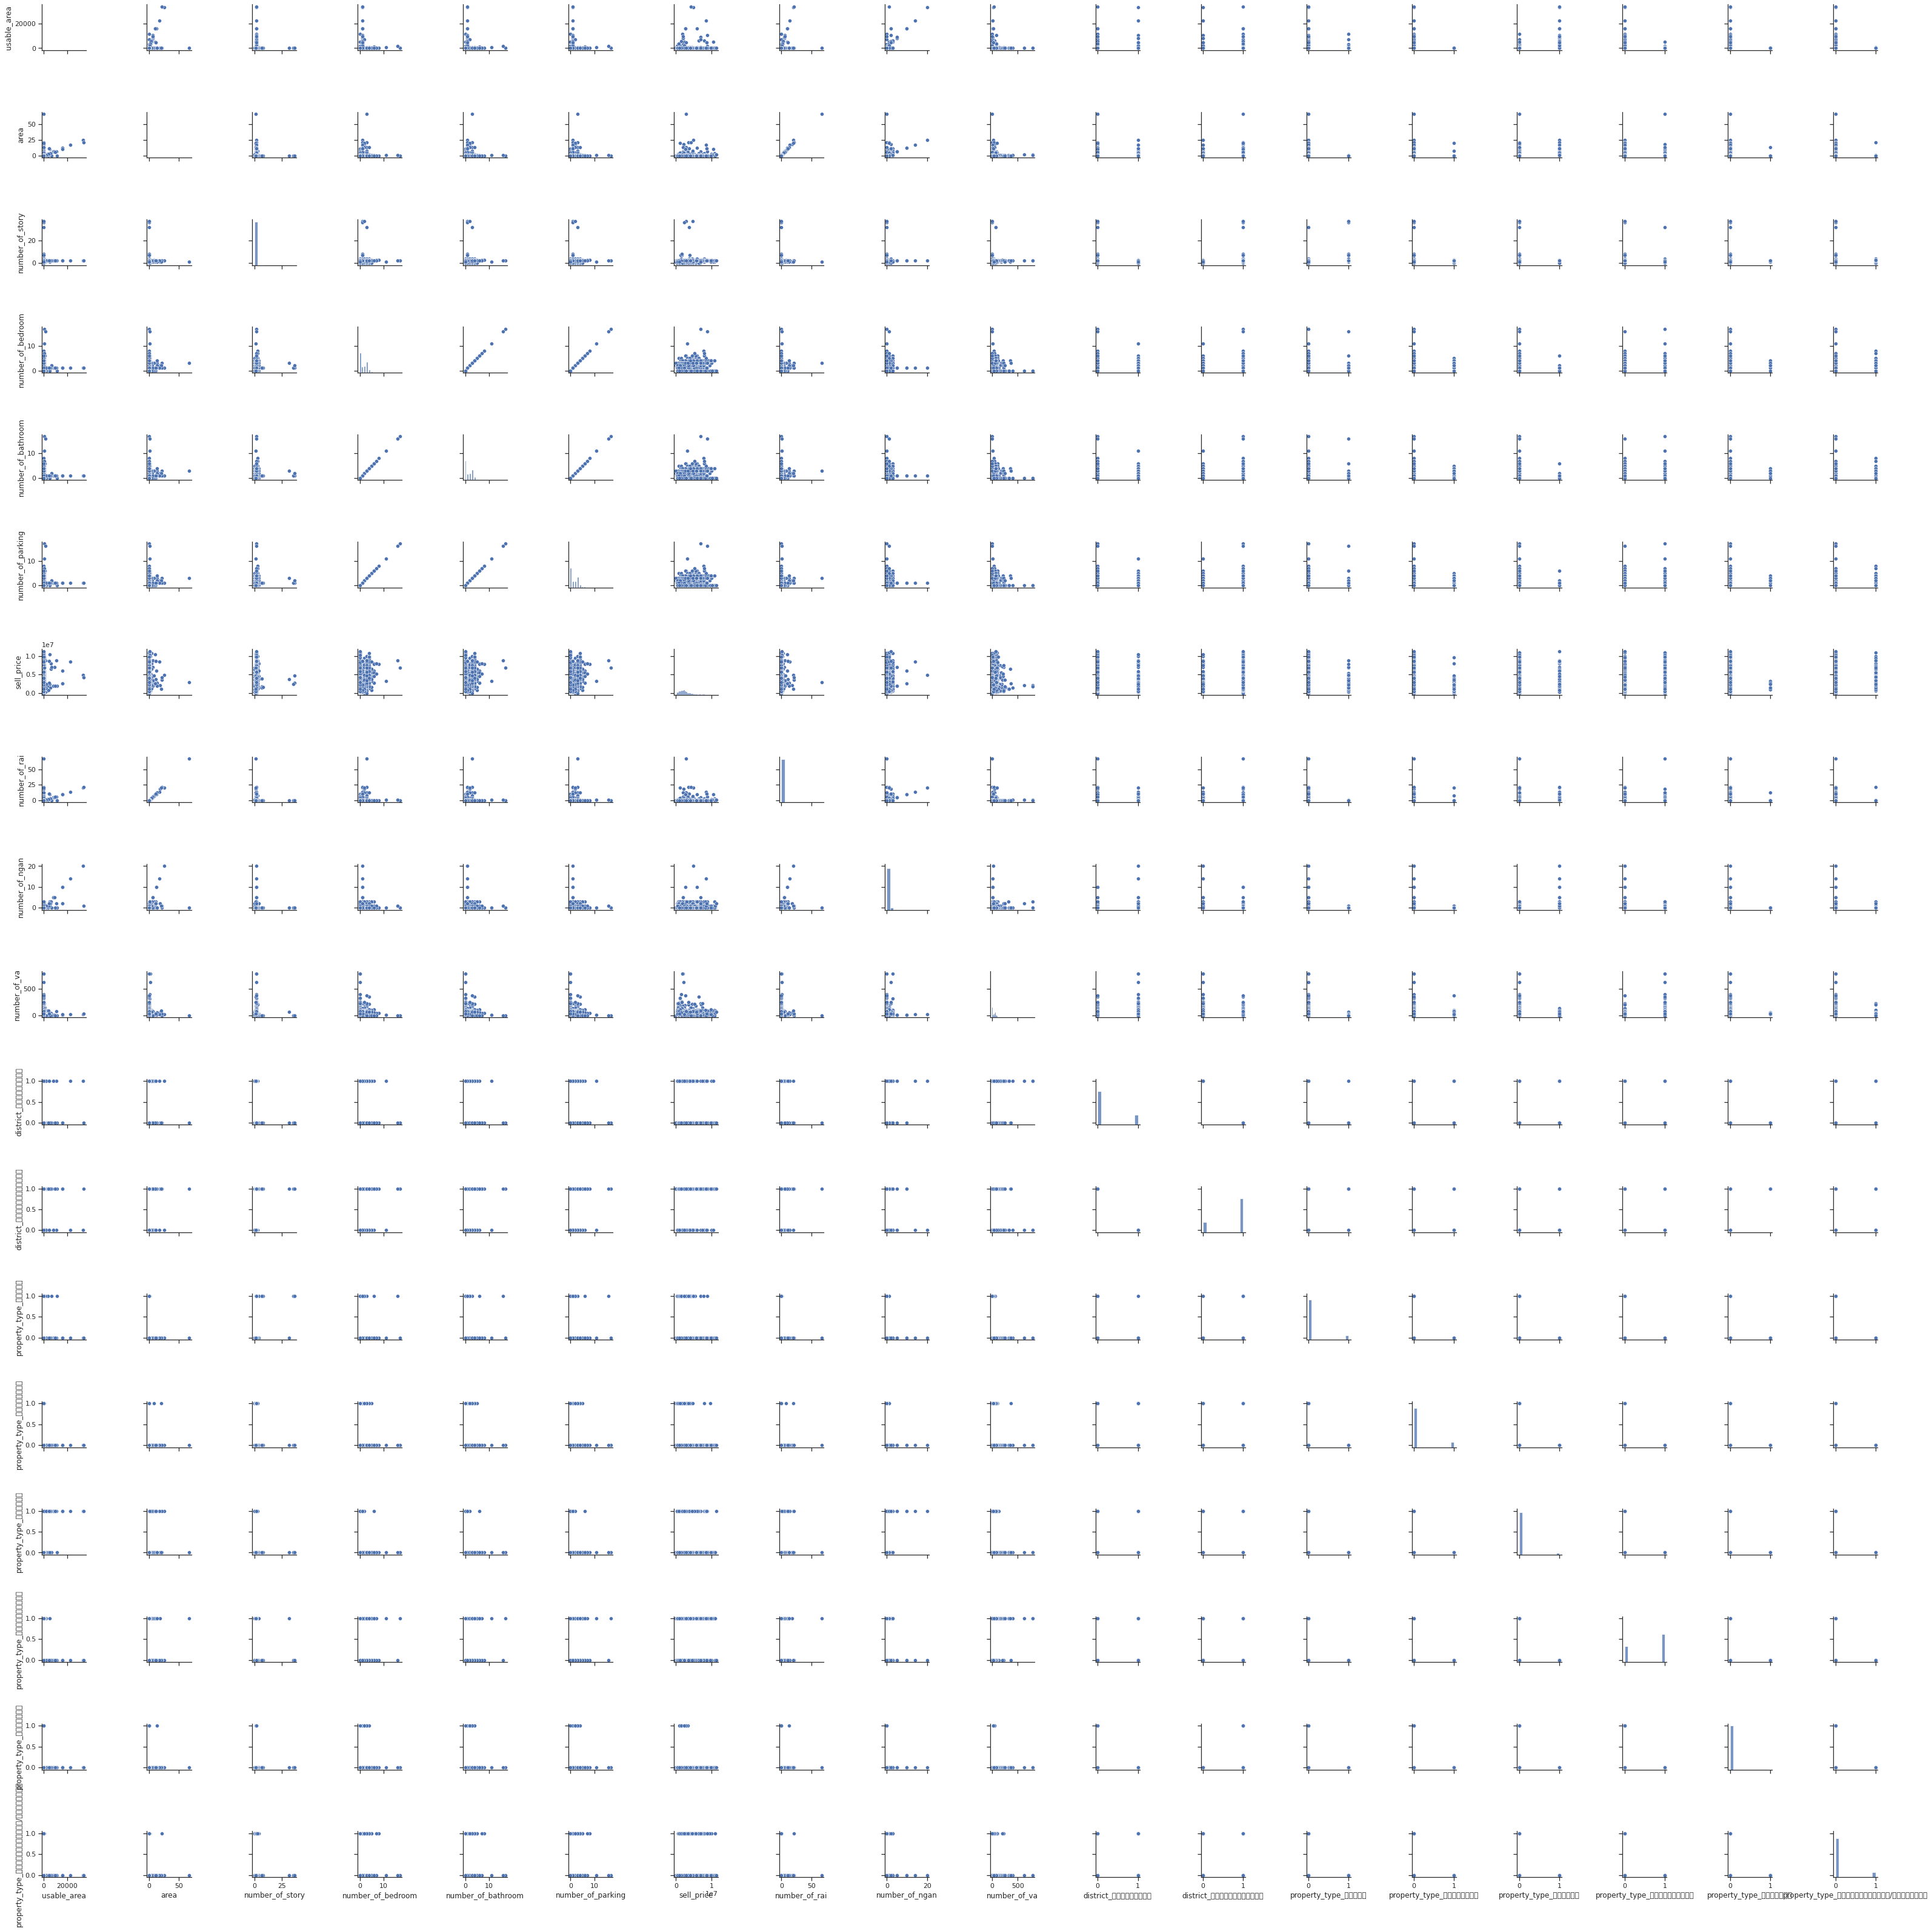

In [138]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(data_train_detectO)

In [188]:
set(data_train_detectO.isnull().any())

{False}

In [189]:
data_train_detectO

,usable_area,area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,sell_price,number_of_rai,number_of_ngan,number_of_va,district_ต่างอำเภอ,district_เมืองขอนแก่น,property_type_คอนโด,property_type_ทาวน์โฮม,property_type_ที่ดิน,property_type_บ้านเดี่ยว,property_type_บ้านแฝด,property_type_อาคารพาณิชย์/สำนักงาน
0,0.0,0.061500,2.0,0.0,0.0,0.0,2860000.0,0.0,0.0,98.4,0,1,0,0,0,1,0,0
2,208.0,0.032500,1.0,3.0,3.0,3.0,2800000.0,0.0,0.0,52.0,0,1,0,0,0,1,0,0
3,145.0,0.025000,2.0,3.0,3.0,3.0,2600000.0,0.0,0.0,40.0,0,1,0,0,0,1,0,0
4,114.0,0.031250,1.0,2.0,2.0,2.0,1490000.0,0.0,0.0,50.0,0,1,0,0,0,1,0,0
5,29.0,0.000000,2.0,1.0,1.0,1.0,1750000.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2717,0.0,0.011562,2.0,0.0,0.0,0.0,2310000.0,0.0,0.0,18.5,0,1,0,1,0,0,0,0
2721,4625.0,11.515625,2.0,1.0,1.0,1.0,8671875.0,11.0,2.0,25.0,1,0,0,0,1,0,0,0
2722,0.0,0.036250,2.0,0.0,0.0,0.0,1400000.0,0.0,0.0,58.0,0,1,0,0,0,1,0,0
2723,0.0,0.048750,2.0,0.0,0.0,0.0,2915000.0,0.0,0.0,78.0,0,1,0,0,0,1,0,0


In [141]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error as mse
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [190]:
colName = ['usable_area',	'area',	'number_of_story',	'number_of_bedroom',	'number_of_bathroom',	'number_of_parking',	'district_ต่างอำเภอ',	'district_เมืองขอนแก่น',	'property_type_คอนโด',	'property_type_ทาวน์โฮม',	'property_type_ที่ดิน',	'property_type_บ้านเดี่ยว','property_type_บ้านแฝด','property_type_อาคารพาณิชย์/สำนักงาน','sell_price']
data_train_detect1 = data_train_detectO[colName]
data_train_detect1.head()


,usable_area,area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,district_ต่างอำเภอ,district_เมืองขอนแก่น,property_type_คอนโด,property_type_ทาวน์โฮม,property_type_ที่ดิน,property_type_บ้านเดี่ยว,property_type_บ้านแฝด,property_type_อาคารพาณิชย์/สำนักงาน,sell_price
0,0.0,0.06150,2.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0,2860000.0
2,208.0,0.03250,1.0,3.0,3.0,3.0,0,1,0,0,0,1,0,0,2800000.0
3,145.0,0.02500,2.0,3.0,3.0,3.0,0,1,0,0,0,1,0,0,2600000.0
4,114.0,0.03125,1.0,2.0,2.0,2.0,0,1,0,0,0,1,0,0,1490000.0
5,29.0,0.00000,2.0,1.0,1.0,1.0,0,1,1,0,0,0,0,0,1750000.0


In [191]:
data_X = data_train_detectO.drop('sell_price',axis=1) # Independet variable
#X = data_X.values
data_y = data_train_detectO['sell_price'] # dependent variable
#y = data_y.values

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.1, random_state=0)

In [192]:
print(X_train.shape)
X_train

(1560, 17)


,usable_area,area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,number_of_rai,number_of_ngan,number_of_va,district_ต่างอำเภอ,district_เมืองขอนแก่น,property_type_คอนโด,property_type_ทาวน์โฮม,property_type_ที่ดิน,property_type_บ้านเดี่ยว,property_type_บ้านแฝด,property_type_อาคารพาณิชย์/สำนักงาน
1913,289.00,0.045187,2.0,3.0,3.0,3.0,0.0,0.0,72.3,0,1,0,0,0,1,0,0
1993,0.00,0.049063,2.0,0.0,0.0,0.0,0.0,0.0,78.5,0,1,0,0,0,1,0,0
27,200.00,0.012312,3.0,3.0,3.0,3.0,0.0,0.0,19.7,0,1,0,0,0,0,0,1
2061,166.00,0.018750,3.0,3.0,3.0,3.0,0.0,0.0,30.0,0,1,0,1,0,0,0,0
888,0.00,0.033750,1.0,3.0,3.0,3.0,0.0,0.0,54.0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,213.75,0.756250,2.0,4.0,4.0,4.0,0.0,3.0,10.0,1,0,0,0,0,1,0,0
1932,0.00,0.041437,2.0,0.0,0.0,0.0,0.0,0.0,66.3,0,1,0,0,0,1,0,0
2599,120.00,0.016875,2.0,2.0,2.0,2.0,0.0,0.0,27.0,0,1,0,0,0,0,0,1
883,82.00,0.051250,2.0,2.0,2.0,2.0,0.0,0.0,82.0,0,1,0,0,0,0,0,1


In [193]:
print(X_test.shape)
X_test

(174, 17)


,usable_area,area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,number_of_rai,number_of_ngan,number_of_va,district_ต่างอำเภอ,district_เมืองขอนแก่น,property_type_คอนโด,property_type_ทาวน์โฮม,property_type_ที่ดิน,property_type_บ้านเดี่ยว,property_type_บ้านแฝด,property_type_อาคารพาณิชย์/สำนักงาน
2548,33.0,0.000000,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0
2011,489.0,1.005000,1.0,11.0,11.0,11.0,1.0,0.0,8.0,1,0,0,0,0,1,0,0
1810,0.0,1.025000,2.0,0.0,0.0,0.0,1.0,0.0,40.0,1,0,0,0,0,1,0,0
252,0.0,0.062187,2.0,0.0,0.0,0.0,0.0,0.0,99.5,1,0,0,0,0,1,0,0
824,70.7,0.011250,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,96.0,0.012500,2.0,0.0,0.0,0.0,0.0,0.0,20.0,1,0,0,1,0,0,0,0
672,43.0,0.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0
2549,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1
2577,0.0,0.015000,2.0,2.0,2.0,2.0,0.0,0.0,24.0,1,0,0,1,0,0,0,0


In [194]:
lm = LinearRegression()

In [195]:
model = lm.fit(X_train, y_train)

In [196]:
scores = cross_val_score(lm, X_train, y_train, cv=10, scoring='r2')
print("Cross-validated scores:", scores)

Cross-validated scores: [0.23926746 0.29039026 0.17739354 0.25691005 0.23010525 0.2358857
 0.26065225 0.17490916 0.45775402 0.29414967]


In [197]:
predictions = cross_val_predict(model, X_test, y_test, cv=10)  
print(len(predictions))
predictions

174


array([ 1.95690728e+06,  4.57948615e+06,  1.00894817e+06,  1.16779868e+06,
        2.18800956e+06,  4.79528419e+06,  4.04762811e+06,  2.54877835e+06,
        3.46658141e+06,  3.64850597e+06,  3.23595673e+06,  6.94008948e+04,
        2.85720169e+06,  1.08273929e+06,  2.84138263e+06,  3.40392149e+06,
        3.35787195e+06,  1.73211074e+06,  3.18068096e+06,  3.18802225e+06,
        2.74699970e+06,  4.50233646e+06,  4.43226531e+06,  2.72581946e+06,
        2.26094963e+06,  3.84628152e+05,  4.43697724e+06,  3.67245295e+06,
        1.80177079e+06,  1.72519083e+06,  3.15360279e+06,  2.46219784e+06,
        1.69201879e+06,  2.31523116e+06,  1.77151792e+06,  2.30756713e+06,
        2.69312383e+06,  3.14358834e+06,  3.72115435e+06,  2.92732537e+06,
        2.87789880e+06,  8.24167052e+06,  2.84256069e+06,  3.15945278e+06,
        1.59729625e+06,  3.96396913e+06,  1.95232282e+06,  1.76136430e+06,
        2.43562563e+06,  1.76444201e+06,  4.20149025e+06,  3.98679029e+06,
        3.97571748e+06,  

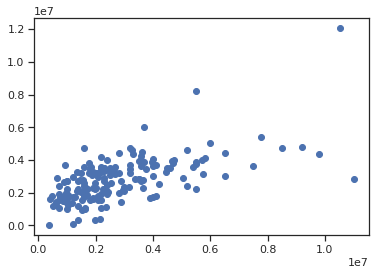

In [198]:
plt.scatter(y_test, predictions)

In [199]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1125219.4649912342
MSE: 2305997671386.896
RMSE: 1518551.1750964785


In [200]:
import pickle

# Dump the trained decision tree classifier with Pickle
model_filename = '/content/drive/MyDrive/DPDM65/Linear-Regressor.pkl'
# Open the file to save as pkl file
model_pkl = open(model_filename, 'wb')
pickle.dump(model, model_pkl)
# Close the pickle instances
model_pkl.close()

In [201]:
# Loading the saved decision tree model pickle
Regressor = open(model_filename, 'rb')
Regressor_model = pickle.load(Regressor)
print("Loaded Decision tree model :: ", Regressor_model)

Loaded Decision tree model ::  LinearRegression()


In [202]:
# prediction from Load model
pred = Regressor_model.predict(X_test)
print(len(pred))
print(pred)

174
[2087656.98025059 4517564.36168308 1195918.79643176 1311605.60329616
 2558378.27402541 4347392.57382141 4727582.47562484 2868155.94324197
 3625140.4887518  4124395.66283469 3659303.20728079  124525.41959722
 3837716.32161492 1242465.17027291 3105999.03284193 3682988.69192016
 3670633.92442527 1509714.05587465 3064833.69058936 3227878.99516745
 2826884.42322194 4987008.73586804 4611501.93297619 2809865.23970853
 3112891.5536565   940943.1816572  4708315.63491989 3948510.22908604
 1493687.05175105 2086735.33493522 3343993.75921245 2632945.13435432
 2087185.9170894  3112154.2374042  1727519.53810667 2319861.70114093
 1727488.08526657 3749216.56734516 3756219.92070043 2670770.48567062
 3332167.7097805  5554667.57388467 3644761.32853159 3626738.00729845
 1527222.32725993 3920871.91009406 1508389.91267001 1771424.7255373
 1638137.37182115 1771383.76352328 4718993.58662979 4388911.45090999
 4099025.48204126 2816672.91311389 2283985.29706273 1713621.82297527
 2403732.14564013 4626561.99151

In [209]:
print("Coefficients: \n", model.coef_)

Coefficients: 
 [-2.04810070e+01  5.11796047e+04  7.94931633e+04  1.05431233e+05
  1.05431233e+05  1.05431233e+05 -4.02862342e+04  3.65858117e+05
  2.09541069e+03 -7.90294968e+05  7.90294968e+05 -5.31793956e+05
 -6.51902704e+05  5.04070261e+05  3.76686334e+05 -1.03798815e+06
  1.34092822e+06]


In [203]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1111236.5956128377
MSE: 2439944411316.6494
RMSE: 1562032.1415760464


In [204]:
X_test['sell_price'] = pred
X_test ##เป็นตาราง test ของอาจารย์

,usable_area,area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,number_of_rai,number_of_ngan,number_of_va,district_ต่างอำเภอ,district_เมืองขอนแก่น,property_type_คอนโด,property_type_ทาวน์โฮม,property_type_ที่ดิน,property_type_บ้านเดี่ยว,property_type_บ้านแฝด,property_type_อาคารพาณิชย์/สำนักงาน,sell_price
2548,33.0,0.000000,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0,2.087657e+06
2011,489.0,1.005000,1.0,11.0,11.0,11.0,1.0,0.0,8.0,1,0,0,0,0,1,0,0,4.517564e+06
1810,0.0,1.025000,2.0,0.0,0.0,0.0,1.0,0.0,40.0,1,0,0,0,0,1,0,0,1.195919e+06
252,0.0,0.062187,2.0,0.0,0.0,0.0,0.0,0.0,99.5,1,0,0,0,0,1,0,0,1.311606e+06
824,70.7,0.011250,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0,1,0,0,0,1,0,0,2.558378e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,96.0,0.012500,2.0,0.0,0.0,0.0,0.0,0.0,20.0,1,0,0,1,0,0,0,0,1.119223e+05
672,43.0,0.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0,1.771158e+06
2549,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,1.905185e+06
2577,0.0,0.015000,2.0,2.0,2.0,2.0,0.0,0.0,24.0,1,0,0,1,0,0,0,0,7.549854e+05


In [205]:
X_test['INDEX'] =  X_test.index+1

In [206]:
df_precict = X_test[['INDEX', 'sell_price']]
df_precict

,INDEX,sell_price
2548,2549,2.087657e+06
2011,2012,4.517564e+06
1810,1811,1.195919e+06
252,253,1.311606e+06
824,825,2.558378e+06
...,...,...
815,816,1.119223e+05
672,673,1.771158e+06
2549,2550,1.905185e+06
2577,2578,7.549854e+05


In [207]:
df_precict.to_csv('/content/drive/MyDrive/DPDM65/predicted_y.csv')